# Principal component analysis (PCA) / Метод главных компонент (МГК)

---

**Источники:**

[Principal Component Analysis and k-means Clustering to Visualize a High Dimensional Dataset](https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2)

[PCA using Python (scikit-learn)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

[Everything you did and didn't know about PCA](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/)

[Feature Extraction using Principal Component Analysis — A Simplified Visual Demo](https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a)

[]()

[]()

[]()

[]()

[]()

[]()

---

## Подготовка окружения

In [69]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [70]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [71]:
import numpy as np

np.__version__

'1.20.2'

In [72]:
import pandas as pd

pd.__version__

'1.2.4'

In [73]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [74]:
import seaborn as sns

sns.__version__

'0.11.1'

In [75]:
import sklearn

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import SimpleImputer

sklearn.__version__

'0.24.2'

In [76]:
import missingno as msno

msno.__version__

'0.4.2'

In [77]:
# ipympl + widget включает интерактивные функции matplotlib

# !conda install ipympl -y
# !conda install -c conda-forge nodejs

## Описание

TODO

<img src="images/explained_variance_ratio_1.png"/>

<img src="images/explained_variance_ratio_2.png" width=300/>

## Customer Clustering

### Загрузка данных

[Источник (Customer Clustering)](https://www.kaggle.com/dev0914sharma/customer-clustering)

In [78]:
df = pd.read_csv("./../../data/segmentation data.csv", index_col=0)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


### Анализ данных

#### Типы данных

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


#### Пропущенные значения

In [80]:
df.isna().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

#### Распределение данных

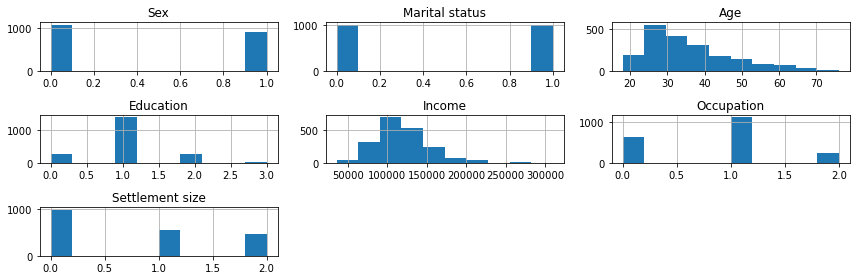

In [81]:
df.hist(figsize=(12, 4))
plt.tight_layout()

### Подготовка

#### Масштабирование

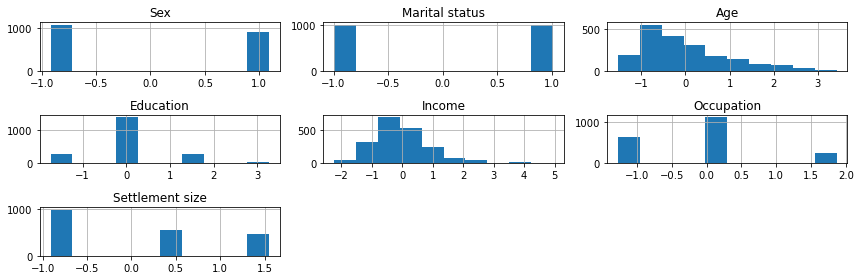

In [82]:
df_norm = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
df_norm.hist(figsize=(12, 4))
plt.tight_layout()

#### Полезные функции

In [83]:
def explained_variance_plot(pca):
    features = range(pca.n_components_)
    cumulative_sum = np.cumsum(pca.explained_variance_ratio_)

    plt.xlabel('PCA features')
    plt.ylabel('variance %')
    plt.xticks(features)
    
    plt.bar(features, pca.explained_variance_ratio_, align='center', label='Individual explained variance')
    plt.step(range(0,len(cumulative_sum)), cumulative_sum, where='mid',label='Cumulative explained variance')
    
    plt.legend(loc='best')
    plt.tight_layout()

### N-D PCA

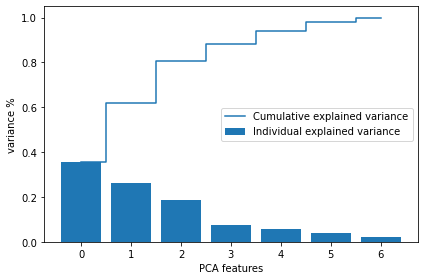

In [84]:
pca = PCA()
pca.fit(df_norm)
explained_variance_plot(pca)

### 2-D PCA

<AxesSubplot:xlabel='0', ylabel='1'>

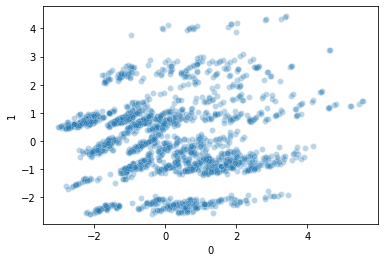

In [85]:
pca_2 = PCA(n_components=2)
df_pca_2 = pd.DataFrame(pca_2.fit_transform(df_norm))
sns.scatterplot(x=df_pca_2[0], y=df_pca_2[1], alpha=0.3)

### 3-D PCA

In [86]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))

In [87]:
%matplotlib widget

In [91]:
from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-55, elev=45)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [92]:
%matplotlib inline

---

## Credit Card Dataset for Clustering

### Загрузка данных

[Источник (Credit Card Dataset for Clustering)](https://www.kaggle.com/arjunbhasin2013/ccdata)

In [93]:
df = pd.read_csv("./../../data/CC GENERAL.csv", index_col=0)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


### Анализ данных

#### Типы данных

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

#### Пропущенные значения

In [95]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### Распределение данных

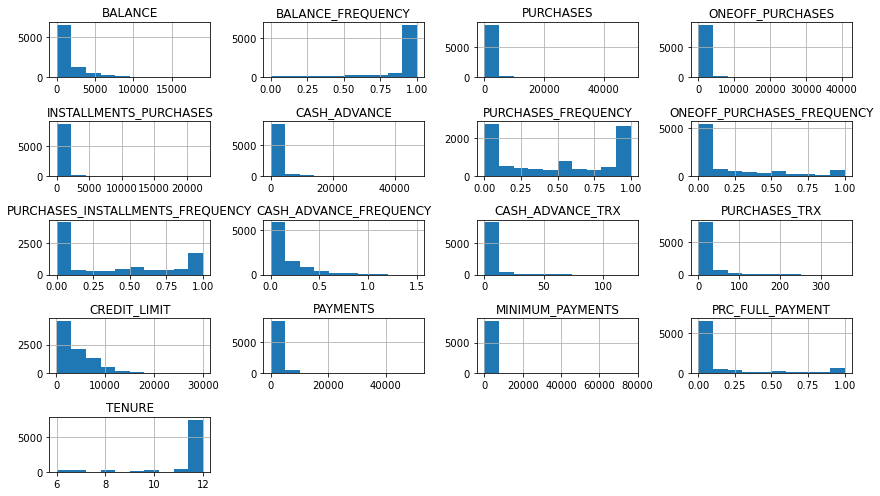

In [96]:
df.hist(figsize=(12, 7))
plt.tight_layout()

### Подготовка

#### Пропущенные значения

In [97]:
df_without_nan = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(df), columns=df.columns)
df_without_nan.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### Масштабирование

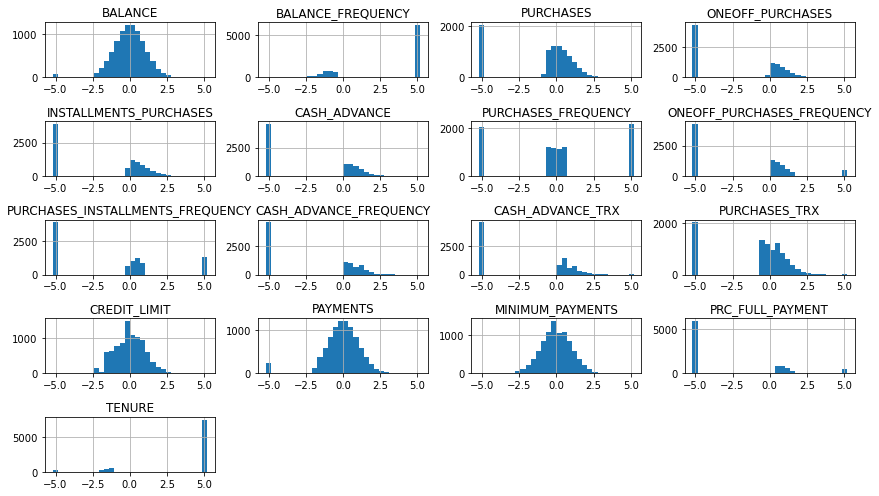

In [98]:
norm_trans = QuantileTransformer(output_distribution='normal')
df_norm = pd.DataFrame(norm_trans.fit_transform(df_without_nan), columns=df.columns)
df_norm.hist(bins=30, figsize=(12, 7))
plt.tight_layout()

### N-D PCA

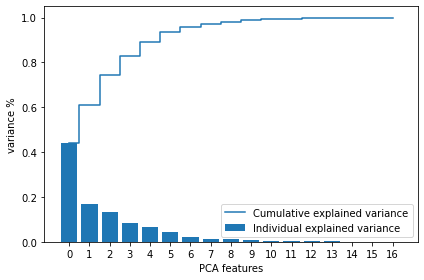

In [99]:
pca = PCA()
pca.fit(df_norm)
explained_variance_plot(pca)

### 2-D PCA

In [100]:
pca_2 = PCA(n_components=2)
df_pca_2 = pd.DataFrame(pca_2.fit_transform(df_norm))
df_pca_2

,0,1
0,2.163699,-6.912246
1,-11.234460,-3.138915
2,4.975619,5.658303
3,-3.872844,4.528866
4,0.612076,1.129461
...,...,...
8945,5.714757,-6.516668
8946,4.694801,-4.960993
8947,3.275390,-8.942454
8948,-10.979687,-5.694503


<AxesSubplot:xlabel='0', ylabel='1'>

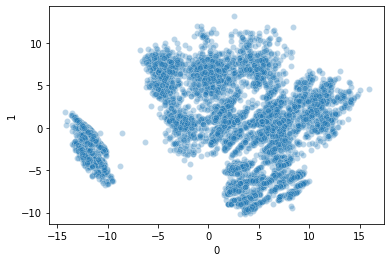

In [101]:
sns.scatterplot(x=df_pca_2[0], y=df_pca_2[1], alpha=0.3)

### 3-D PCA

In [102]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))
df_pca_3

,0,1,2
0,2.163699,-6.912246,-0.353669
1,-11.234460,-3.138915,-0.281445
2,4.975619,5.658303,-7.210849
3,-3.872844,4.528866,-4.249755
4,0.612076,1.129461,-6.505020
...,...,...,...
8945,5.714757,-6.516668,1.963035
8946,4.694801,-4.960993,2.387508
8947,3.275390,-8.942454,-0.812840
8948,-10.979687,-5.694503,-2.295634


In [103]:
%matplotlib widget

In [105]:
from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-120, elev=-25)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [106]:
%matplotlib inline

---

## Simple Clustering Data ID Gender Income Spending

### Загрузка данных

[Источник (Simple Clustering Data ID Gender Income Spending)](https://www.kaggle.com/harrimansaragih/clustering-data-id-gender-income-spending)

In [107]:
df = pd.read_csv("./../../data/ClusteringHSS.csv", index_col=0)
df

,Gender_Code,Region,Income,Spending
ID,,,,
1,Female,Rural,20.0,15.0
2,Male,Rural,5.0,12.0
3,Female,Urban,28.0,18.0
4,Male,Urban,40.0,10.0
5,Male,Urban,42.0,9.0
...,...,...,...,...
1109,Female,Urban,33.0,16.0
1110,Male,Urban,48.0,7.0
1111,Male,Urban,31.0,16.0


### Анализ данных

#### Типы данных

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 1 to 1113
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender_Code  1107 non-null   object 
 1   Region       1107 non-null   object 
 2   Income       1107 non-null   float64
 3   Spending     1108 non-null   float64
dtypes: float64(2), object(2)
memory usage: 43.5+ KB


#### Пропущенные значения

In [109]:
df.isna().sum()

Gender_Code    6
Region         6
Income         6
Spending       5
dtype: int64

In [110]:
# процент пропущенных значений в каждой колонке
percent_missing = round(df.isnull().mean()*100, 2)
percent_missing.sort_values(ascending=False)

Gender_Code    0.54
Region         0.54
Income         0.54
Spending       0.45
dtype: float64

<AxesSubplot:>

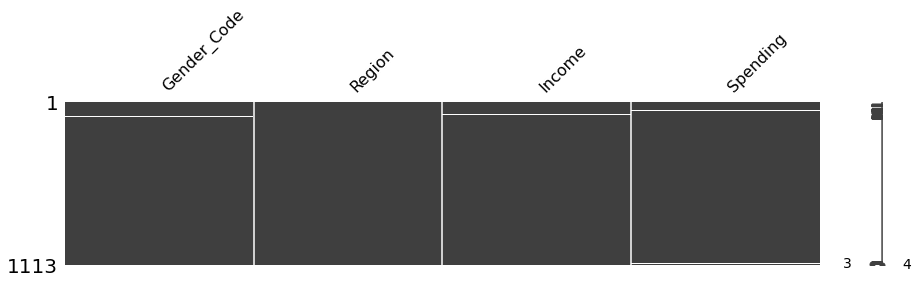

In [111]:
msno.matrix(df, figsize=(15, 3))

#### Распределение данных

In [112]:
df.Gender_Code.value_counts()

Male      572
Female    535
Name: Gender_Code, dtype: int64

In [113]:
df.Region.value_counts()

Rural    558
Urban    549
Name: Region, dtype: int64

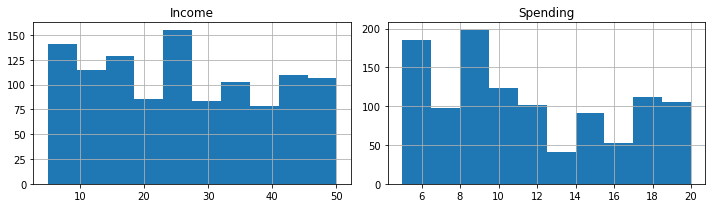

In [114]:
df.hist(figsize=(10, 3))
plt.tight_layout()

### Подготовка

#### Пропущенные значения

In [115]:
# удалить все СТРОКИ с пропущенными ячейками
# сохранить результат в новой переменной
df_without_na = df.dropna(axis='rows').reset_index(drop=True)
df_without_na.isna().sum()

Gender_Code    0
Region         0
Income         0
Spending       0
dtype: int64

#### Масштабирование

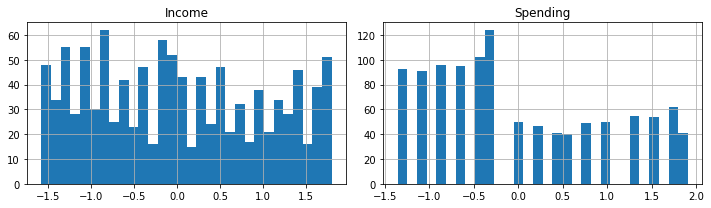

In [116]:
# norm_trans = QuantileTransformer(output_distribution='normal')
norm_trans = StandardScaler()
df_norm = pd.DataFrame(norm_trans.fit_transform(df_without_na[['Income', 'Spending']]), columns=['Income', 'Spending'])
df_norm.hist(bins=30, figsize=(10, 3))
plt.tight_layout()

#### Категориальные признаки

In [117]:
enc = OrdinalEncoder()
df_without_na[['is_Male', 'is_Urban']] = enc.fit_transform(df_without_na[['Gender_Code', 'Region']])
df_without_na[['Gender_Code', 'is_Male', 'Region', 'is_Urban']]

,Gender_Code,is_Male,Region,is_Urban
0,Female,0.0,Rural,0.0
1,Male,1.0,Rural,0.0
2,Female,0.0,Urban,1.0
3,Male,1.0,Urban,1.0
4,Male,1.0,Urban,1.0
...,...,...,...,...
1085,Female,0.0,Urban,1.0
1086,Male,1.0,Urban,1.0
1087,Male,1.0,Urban,1.0
1088,Male,1.0,Urban,1.0


In [118]:
df_norm = df_norm.join(df_without_na[['is_Male', 'is_Urban']])
df_norm

,Income,Spending,is_Male,is_Urban
0,-0.450770,0.819166,0.0,0.0
1,-1.573918,0.166150,1.0,0.0
2,0.148242,1.472182,0.0,1.0
3,1.046760,-0.269194,1.0,1.0
4,1.196513,-0.486867,1.0,1.0
...,...,...,...,...
1085,0.522624,1.036838,0.0,1.0
1086,1.645772,-0.922211,1.0,1.0
1087,0.372871,1.036838,1.0,1.0
1088,1.795525,0.601494,1.0,1.0


### N-D PCA

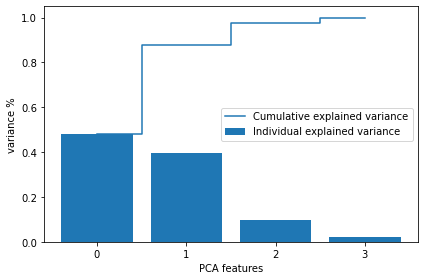

In [119]:
pca = PCA()
pca.fit(df_norm)
explained_variance_plot(pca)

### 2-D PCA

In [120]:
pca_2 = PCA(n_components=2)
df_pca_2 = pd.DataFrame(pca_2.fit_transform(df_norm))
df_pca_2

,0,1
0,-0.479088,0.935988
1,-1.564357,0.425079
2,0.577977,1.412554
3,1.114243,-0.488559
4,1.210370,-0.726368
...,...,...
1085,0.837343,0.925103
1086,1.536847,-1.225652
1087,0.738819,0.902799
1088,1.937751,0.249688


<AxesSubplot:xlabel='0', ylabel='1'>

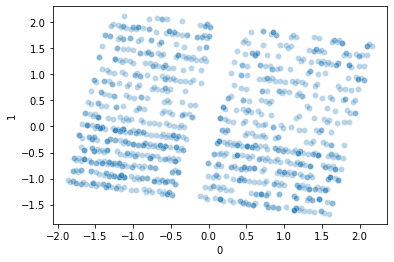

In [121]:
sns.scatterplot(x=df_pca_2[0], y=df_pca_2[1], alpha=0.3)

### 3-D PCA

In [122]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))
df_pca_3

,0,1,2
0,-0.479088,0.935988,0.452970
1,-1.564357,0.425079,-0.554980
2,0.577977,1.412554,0.481493
3,1.114243,-0.488559,-0.420385
4,1.210370,-0.726368,-0.407177
...,...,...,...
1085,0.837343,0.925103,0.510264
1086,1.536847,-1.225652,-0.376052
1087,0.738819,0.902799,-0.492568
1088,1.937751,0.249688,-0.430830


In [123]:
%matplotlib widget

In [125]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-100, elev=30)


ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], 
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [126]:
%matplotlib inline